Домашнее задание

# I part

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

Скачайте текст войны и мир (ссылка на github и гугл диск).  
Очистите его, оставив только русские буквы и символы пробела.  

In [2]:
text = str()

for i in range(1,5): 
    with open(f'../AMLHW_15_mrf/war_and_peace/tom_{i}.txt', 'r', encoding='utf-8') as f:
        text += f.read().lower()
text = re.sub(r'[^а-яё ]','', text)

Постройте матрицу переходных вероятностей.  

In [3]:
RUSSIAN_WITH_SPACE = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN_WITH_SPACE)}

In [4]:
probabilities = np.zeros((len(RUSSIAN_WITH_SPACE), len(RUSSIAN_WITH_SPACE)))

In [5]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [6]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [7]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN_WITH_SPACE), columns=(c for c in RUSSIAN_WITH_SPACE))

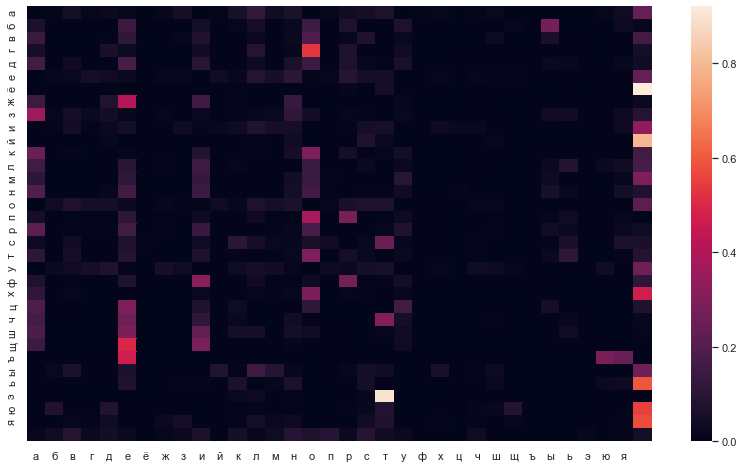

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;  

In [32]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN_WITH_SPACE)
for c in RUSSIAN_WITH_SPACE:
    for s_c in RUSSIAN_WITH_SPACE:
        proba = prior * probabilities[start, POS[c]] * \
                    probabilities[POS[c], POS[s_c]] * probabilities[POS[s_c], end]
        if proba > 0.00001:
            print(''.join(['п', c, s_c, 'р']), proba)

пегр 1.1112317321777153e-05
пепр 1.2112841989055931e-05
пе р 1.854375468700912e-05
побр 2.9433951560885752e-05
повр 1.4354422427861556e-05
погр 3.84767361012238e-05
подр 3.817691323612121e-05
поер 2.580608653130366e-05
попр 4.141720191311109e-05
потр 4.228590463090975e-05
по р 6.000469108869473e-05
прар 7.43645140131875e-05
прер 0.00011985973476310438
прор 9.147367042682817e-05
прур 1.5378847130707658e-05
пь р 1.570248682561254e-05


Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [22]:
s = []
start = "б"
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN_WITH_SPACE), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бешанюдод


# II

Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.